# Decision Tree
Decision Tree is a Supervised learning technique that can be applicable for both classification and Regression problems, but generally it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, edges represent the decision rules and each leaf node represents the outcome.    
It is a graphical representation for all the possible solutions to a problem based on given conditions.     
In tree construction, we use the Classification and Regression Tree (CART) algorithm.

Steps of Algorithm:

Step-1: Begin the tree with the root node, says S, which contains the dataset as a whole.    
Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).    
Step-3: Divide the S into subsets that contains possible values for the best attributes.    
Step-4: Generate the decision tree node, which havings the best attribute.    
Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further split the nodes and called the final node as a leaf node.

## Decision tree to find out fake or genuine note
    We have bank notes dataset It includes 4 features and one target variable
    features: Variance, Skewness, Curtosis, Entropy
    target: class 

##### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

##### Read data from csv file

In [2]:
df = pd.read_csv('banknotes.csv')
df.head(3)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


##### Explore data

In [3]:
# Check number of records and columns in data

df.shape

(1372, 5)

In [4]:
# Check for the unique categories in target

df.Class.unique()

array([0, 1], dtype=int64)

In [5]:
# Count of fake notes

df.Class.sum()

610

In [6]:
# Count of each class

df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [7]:
# Describe data to check number of records and columns, data type, amd memory usage of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
# Check number of missing records in data

df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

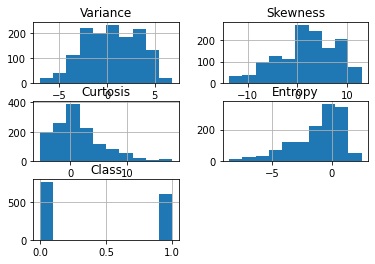

In [9]:
# Plot hist plot to see data distribution

df.hist()
plt.show()

##### Check for the outlayers

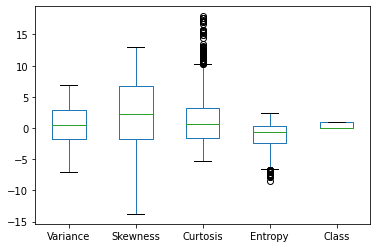

In [10]:
df.plot(kind = 'box')
plt.show()

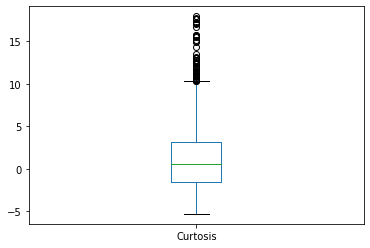

In [11]:
# Check data of Curtosis

df.Curtosis.plot(kind = 'box')
plt.show()

In [12]:
df = df[df.Curtosis < 8.8]

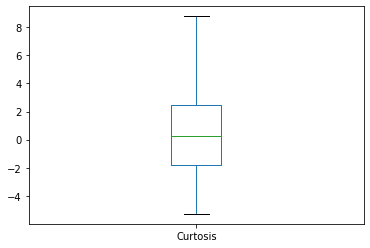

In [13]:
df.Curtosis.plot(kind = 'box')
plt.show()

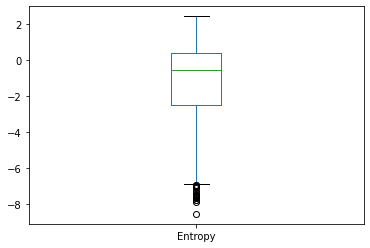

In [14]:
# Check data of Entropy

df.Entropy.plot(kind = 'box')
plt.show()

In [15]:
df = df[df.Entropy >- 5.8]

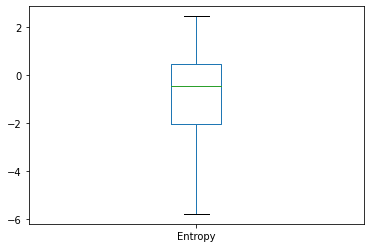

In [16]:
df.Entropy.plot(kind = 'box')
plt.show()

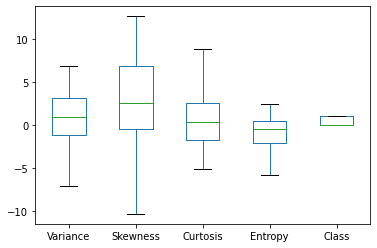

In [17]:
# Check for the whole dataset

df.plot(kind='box')
plt.show()

##### Lets create input and output

In [18]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [19]:
#Feature creation: It can be possible in different ways

#df.drop(columns = 'Class')
#df.iloc[:,:-1]
#df.loc[:,['Variance', 'Skewness', 'Curtosis', 'Entropy']]
#df.loc[:,'Variance':'Entropy']
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]

In [20]:
# Check first two records of feature

X.head(2)

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [21]:
# Create target and check first two records

y = df.Class
y[:2]

0    0
1    0
Name: Class, dtype: int64

##### Split data into training and testing

In [22]:
# 80% records are applied for training and remaining are for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20)

In [23]:
# Check number of records and columns in training data

X_train.shape

(973, 4)

In [24]:
# Check number of records and columns in testing data

X_test.shape

(244, 4)

In [25]:
# Check number of records and columns in feature / input

X.shape

(1217, 4)

##### Training of model

In [26]:
# Create object of model for entropy criteria

model = DecisionTreeClassifier(criterion = 'entropy')

In [27]:
# Check model

model

DecisionTreeClassifier(criterion='entropy')

In [28]:
# Train the model

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

##### Check accuracy of training data

In [29]:
model.score(X_train, y_train) * 100

100.0

##### Check accuracy of testing data

In [30]:
model.score(X_test, y_test) * 100

97.1311475409836

##### Check accuracy of the whole data

In [31]:
model.score(X, y) * 100

99.42481511914544

##### Testing / Prediction

In [32]:
# Data for testing

X_test[:3]

,Variance,Skewness,Curtosis,Entropy
84,3.2450,6.63000,-0.63435,0.86937
12,1.8993,7.66250,0.15394,-3.11080
869,-3.3125,0.10139,0.55323,-0.29570


In [33]:
# Predicted output
y_pred = model.predict(X_test)
y_pred[:3]

array([0, 0, 1], dtype=int64)

In [34]:
# Actual output
y_test[:3]

84     0
12     0
869    1
Name: Class, dtype: int64

##### Confusion matrix
It is to check different accuracy metrix for data

In [35]:
confusion_matrix(y_test, y_pred)

array([[157,   5],
       [  2,  80]], dtype=int64)

In [36]:
len(y_test[y_test == 0])

162

In [37]:
len(y_pred[y_pred == 1])

85

In [38]:
# Check classification report to see different matrix for data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       162
           1       0.94      0.98      0.96        82

    accuracy                           0.97       244
   macro avg       0.96      0.97      0.97       244
weighted avg       0.97      0.97      0.97       244



##### Plot the tree

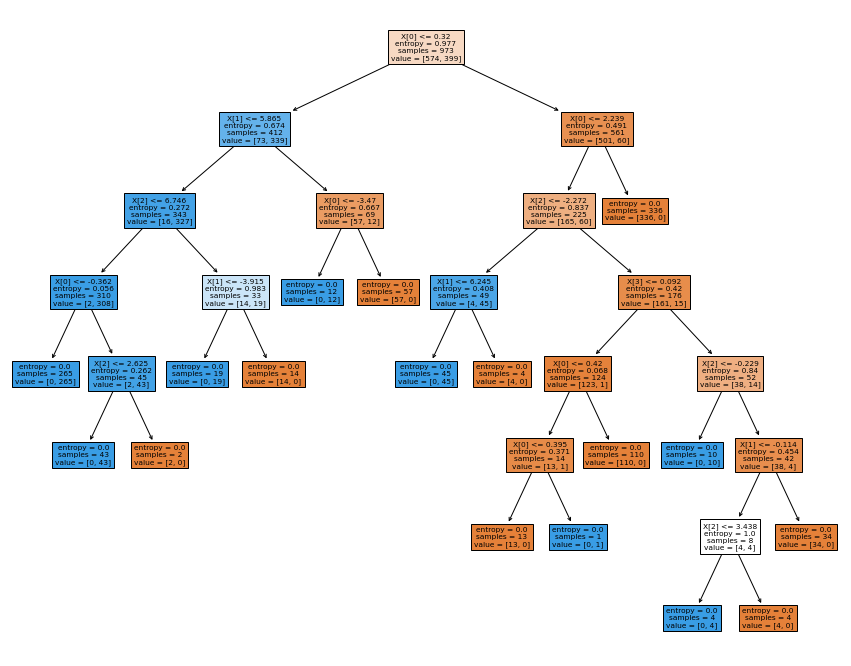

In [39]:
plt.figure(figsize = (15,12))
tree.plot_tree(model,filled = True)
plt.show()